In [233]:
import nba_api
import pandas as pd
import seaborn as sns
from nba_api.stats.static import teams

In [234]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()

denver = [team for team in nba_teams if team['abbreviation'] == 'DEN'][0]
denver_id = denver['id']

In [235]:
from nba_api.stats.endpoints import leaguegamefinder

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=denver_id)
games = gamefinder.get_data_frames()[0]

games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

In [236]:
games = games[games['GAME_DATE'] > '2020-01-01']

In [237]:
def win_percentage_against(opponent_abbreviation, games_df: pd.DataFrame):
    matchups = games_df[games_df['MATCHUP'].str.contains(opponent_abbreviation)]
    print(opponent_abbreviation)
    try:
        return matchups[matchups['WL'] == "W"].shape[0] / matchups.shape[0]
    except ZeroDivisionError:
        return pd.NA

In [238]:
all_team_abbreviations = [team['abbreviation'] for team in teams.get_teams()] 

win_percentages = []
for team in all_team_abbreviations:
    win_percentages.append(win_percentage_against(team, games))

win_percentages_df = pd.DataFrame({'win_percentage' : win_percentages, 'opponent': all_team_abbreviations})

ATL
BOS
CLE
NOP
CHI
DAL
DEN
GSW
HOU
LAC
LAL
MIA
MIL
MIN
BKN
NYK
ORL
IND
PHI
PHX
POR
SAC
SAS
OKC
TOR
UTA
MEM
WAS
DET
CHA


In [239]:
win_percentages_df

,win_percentage,opponent
0,0.750000,ATL
1,0.230769,BOS
2,0.461538,CLE
3,0.666667,NOP
4,0.500000,CHI
5,0.550000,DAL
6,0.609346,DEN
7,0.600000,GSW
8,0.647059,HOU
9,0.600000,LAC


<Axes: xlabel='win_percentage', ylabel='opponent'>

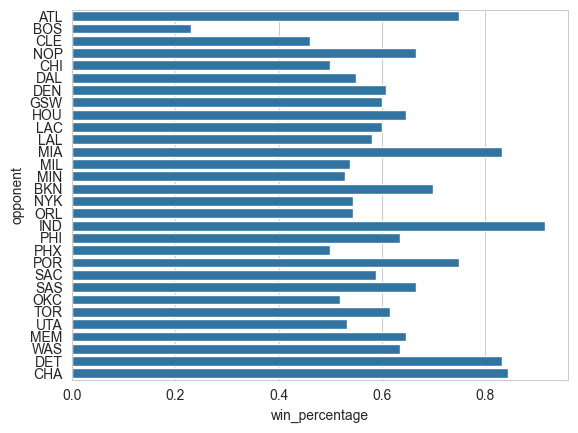

In [240]:
sns.set_style('whitegrid')
sns.barplot(win_percentages_df, x="win_percentage", y="opponent", orient='y',legend=False)

In [241]:
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612743,DEN,Denver Nuggets,0022400936,2025-03-10,DEN @ OKC,W,240,140,...,0.900,9,34,43,32,6,5,12,18,13.0
1,22024,1610612743,DEN,Denver Nuggets,0022400920,2025-03-09,DEN @ OKC,L,239,103,...,0.550,14,34,48,22,3,6,7,18,-24.0
2,22024,1610612743,DEN,Denver Nuggets,0022400909,2025-03-07,DEN vs. PHX,W,266,149,...,0.778,8,30,38,45,8,3,9,22,8.0
3,22024,1610612743,DEN,Denver Nuggets,0022400896,2025-03-05,DEN vs. SAC,W,239,116,...,0.800,11,35,46,28,5,8,13,14,6.0
4,22024,1610612743,DEN,Denver Nuggets,0022400866,2025-03-02,DEN @ BOS,L,241,103,...,0.692,8,30,38,27,11,2,11,18,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,22019,1610612743,DEN,Denver Nuggets,0021900582,2020-01-11,DEN vs. CLE,L,241,103,...,0.722,11,31,42,23,9,4,5,13,-8.0
531,22019,1610612743,DEN,Denver Nuggets,0021900559,2020-01-08,DEN @ DAL,W,240,107,...,0.800,9,29,38,27,7,5,12,22,1.0
532,22019,1610612743,DEN,Denver Nuggets,0021900543,2020-01-06,DEN @ ATL,W,240,123,...,0.741,7,34,41,27,4,6,4,23,8.0
533,22019,1610612743,DEN,Denver Nuggets,0021900528,2020-01-04,DEN @ WAS,L,240,114,...,0.824,9,24,33,18,6,2,12,23,-14.0


In [242]:
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612743,DEN,Denver Nuggets,0022400936,2025-03-10,DEN @ OKC,W,240,140,...,0.900,9,34,43,32,6,5,12,18,13.0
1,22024,1610612743,DEN,Denver Nuggets,0022400920,2025-03-09,DEN @ OKC,L,239,103,...,0.550,14,34,48,22,3,6,7,18,-24.0
2,22024,1610612743,DEN,Denver Nuggets,0022400909,2025-03-07,DEN vs. PHX,W,266,149,...,0.778,8,30,38,45,8,3,9,22,8.0
3,22024,1610612743,DEN,Denver Nuggets,0022400896,2025-03-05,DEN vs. SAC,W,239,116,...,0.800,11,35,46,28,5,8,13,14,6.0
4,22024,1610612743,DEN,Denver Nuggets,0022400866,2025-03-02,DEN @ BOS,L,241,103,...,0.692,8,30,38,27,11,2,11,18,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,22019,1610612743,DEN,Denver Nuggets,0021900582,2020-01-11,DEN vs. CLE,L,241,103,...,0.722,11,31,42,23,9,4,5,13,-8.0
531,22019,1610612743,DEN,Denver Nuggets,0021900559,2020-01-08,DEN @ DAL,W,240,107,...,0.800,9,29,38,27,7,5,12,22,1.0
532,22019,1610612743,DEN,Denver Nuggets,0021900543,2020-01-06,DEN @ ATL,W,240,123,...,0.741,7,34,41,27,4,6,4,23,8.0
533,22019,1610612743,DEN,Denver Nuggets,0021900528,2020-01-04,DEN @ WAS,L,240,114,...,0.824,9,24,33,18,6,2,12,23,-14.0


In [253]:
games.sort_values('GAME_DATE', inplace=True)
games_ma = games.drop(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'PLUS_MINUS'], axis=1).rolling(5).mean()
drop_indeces = games_ma[games_ma.isnull().any(axis=1)].index
games_dropped = games.drop(drop_indeces)
games_ma.dropna(inplace=True)

In [244]:
from sklearn.linear_model import LogisticRegression
import numpy as np

Checking multicollinearity

In [245]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(len(X_train.columns))]

print(vif_data)

    feature         VIF
0    FG_PCT  738.589868
1      FG3M  948.338519
2      FG3A  851.085182
3   FG3_PCT  940.971058
4    FT_PCT  243.705593
5      OREB   41.330779
6      DREB  259.217989
7       AST  211.041971
8       STL   42.911303
9       BLK   22.164781
10      TOV   58.391647
11       PF  104.474431


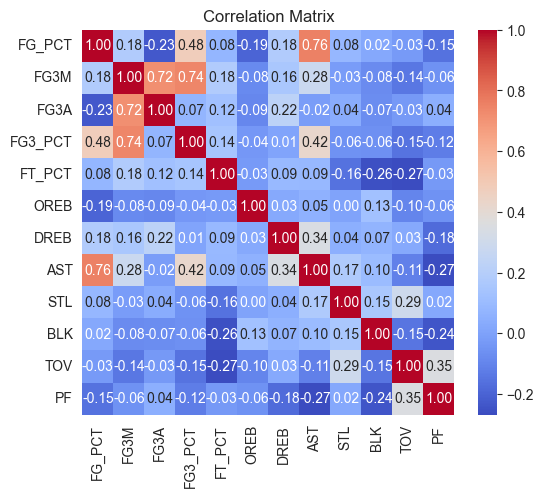

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Removing columns that are correlated

In [254]:
games_ma = games_ma.drop(['FGM', 'FGA', 'FTA', 'FTM', 'REB', 'FG3M', 'FG3A'], axis=1)

In [255]:
X_train = games_ma.sample(frac=0.7, replace=False, random_state=1)
Y_train = [1 if wl == 'W' else 0 for wl in games_dropped[games_dropped.index.isin(X_train.index)].WL]

X_test = games_ma.drop(index=X_train.index)
Y_test = [1 if wl == 'W' else 0 for wl in games_dropped.drop(index=X_train.index).WL]
clf = LogisticRegression(random_state=0).fit(X_train.to_numpy(),Y_train)

/Users/cancokisler/.virtualenvs/NBA_Analytics/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [256]:
X_train

,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF
420,0.5180,0.4172,0.7778,12.6,34.6,29.8,7.0,4.8,13.4,16.2
241,0.5068,0.4356,0.8422,11.2,37.0,28.6,6.2,5.0,13.6,19.2
199,0.4794,0.3006,0.7286,11.8,33.0,26.2,9.0,6.6,14.6,17.8
94,0.4778,0.3948,0.8042,13.4,33.4,30.4,8.0,5.0,12.8,19.2
246,0.5408,0.4478,0.7738,7.6,31.6,31.8,8.2,3.6,14.2,20.6
...,...,...,...,...,...,...,...,...,...,...
252,0.5304,0.3248,0.7442,10.6,34.6,29.0,6.4,5.4,15.0,16.8
412,0.4882,0.3576,0.8416,13.6,34.8,26.2,8.0,4.6,15.0,18.6
118,0.4652,0.3480,0.7956,12.8,32.8,27.0,6.0,5.6,8.4,18.2
360,0.4332,0.3472,0.7702,9.2,32.6,22.4,5.2,4.0,11.8,17.8


In [250]:
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_)), pd.DataFrame( (np.transpose(clf.coef_)/4)*100 )], axis = 1)

,0,0,0
0,FGM,0.472025,11.800625
1,FGA,-0.066272,-1.656798
2,FG_PCT,0.220244,5.506093
3,FG3M,-0.050608,-1.265206
4,FG3A,-0.025800,-0.645007
5,FG3_PCT,0.041331,1.033278
6,FTM,0.020232,0.505792
7,FTA,-0.112695,-2.817375
8,FT_PCT,-0.000469,-0.011721
9,OREB,-0.008414,-0.210345


In [251]:
clf.score(test.drop(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS'], axis=1).to_numpy(), [1 if wl == 'W' else 0 for wl in test.WL], sample_weight=None)

KeyError: "['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS'] not found in axis"

In [ ]:
clf.predict(test.drop(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS'], axis=1).to_numpy()) == [1 if wl == 'W' else 0 for wl in test.WL]

In [ ]:
train.drop(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'PLUS_MINUS'], axis=1).to_numpy()

In [ ]:
games_ma

In [ ]:
games

In [ ]:
games_ma

In [ ]:
games_ma


In [ ]:
games[games.index.isin([0, 2, 4])]